In [105]:
import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

# Para ter melhor print
from IPython.display import display

import seaborn as sns

pd.set_option('display.max_rows', 10)

In [106]:
df = pd.read_excel("Projeto2.xlsx")
df.head(5)

,ano_campeonato,data,rodada,estadio,arbitro,publico,publico_max,time_mandante,time_visitante,tecnico_mandante,...,chutes_bola_parada_mandante,chutes_bola_parada_visitante,defesas_mandante,defesas_visitante,impedimentos_mandante,impedimentos_visitante,chutes_mandante,chutes_visitante,chutes_fora_mandante,chutes_fora_visitante
0,2003,2003-03-29,1,Arena da Baixada,NaN,NaN,NaN,Atlético-PR,Grêmio,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2003,2003-03-29,1,Estádio Brinco de Ouro da Princesa,NaN,NaN,NaN,Guarani,Vasco da Gama,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2003,2003-03-30,1,Estádio Alfredo Jaconi,NaN,NaN,NaN,Juventude,São Paulo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2003,2003-03-30,1,Estádio Manoel Barradas,NaN,NaN,NaN,EC Vitória,Figueirense FC,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2003,2003-03-30,1,Estádio Heriberto Hülse,NaN,NaN,NaN,Criciúma EC,Fluminense,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Das variáveis presentes no DataFrame, existem algumas que são quantitativas e outras que são qualitativas.

Das quantitativas, temos:

- Ano do campeonato;
- Data;
- Rodada;
- Público;
- Colocações;
- Estatísticas do time e da partida.

Das qualitativas, temos:

- Estádio;
- Times no jogo;
- Técnicos dos times;
- Árbitro.

Vamos separar os anos dos campeonatos em ordem crescente:

In [107]:
df = df.sort_values(by=['ano_campeonato'])

In [108]:
df = df.sort_values(by=['data'])
df.head(5)

,ano_campeonato,data,rodada,estadio,arbitro,publico,publico_max,time_mandante,time_visitante,tecnico_mandante,...,chutes_bola_parada_mandante,chutes_bola_parada_visitante,defesas_mandante,defesas_visitante,impedimentos_mandante,impedimentos_visitante,chutes_mandante,chutes_visitante,chutes_fora_mandante,chutes_fora_visitante
0,2003,2003-03-29,1,Arena da Baixada,NaN,NaN,NaN,Atlético-PR,Grêmio,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2003,2003-03-29,1,Estádio Brinco de Ouro da Princesa,NaN,NaN,NaN,Guarani,Vasco da Gama,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2003,2003-03-30,1,Estádio Alfredo Jaconi,NaN,NaN,NaN,Juventude,São Paulo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2003,2003-03-30,1,Estádio Manoel Barradas,NaN,NaN,NaN,EC Vitória,Figueirense FC,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2003,2003-03-30,1,Estádio Heriberto Hülse,NaN,NaN,NaN,Criciúma EC,Fluminense,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Agora, o DataFrame está organizado em ordem cronológica.

In [109]:
df_after2007 = df.loc[df['ano_campeonato'] >= 2007]
df_after2007

,ano_campeonato,data,rodada,estadio,arbitro,publico,publico_max,time_mandante,time_visitante,tecnico_mandante,...,chutes_bola_parada_mandante,chutes_bola_parada_visitante,defesas_mandante,defesas_visitante,impedimentos_mandante,impedimentos_visitante,chutes_mandante,chutes_visitante,chutes_fora_mandante,chutes_fora_visitante
1717,2007,2007-05-03,1,Estádio Municipal Paulo Machado de Carvalho,Alício Pena Junior,5806.0,NaN,Corinthians,Juventude,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1711,2007,2007-05-03,1,Estádio Cícero Pompeu de Toledo,Marcelo de Lima Henrique,0.0,NaN,São Paulo,Goiás EC,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1712,2007,2007-05-03,1,Estádio João Cláudio de Vasconcelos Machado,Washington José Alves de Souza,26469.0,NaN,América-RN,Vasco da Gama,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1713,2007,2007-05-03,1,Estádio Jornalista Mário Filho,Leonardo Gaciba da Silva,7801.0,NaN,Flamengo,Palmeiras,Ney Franco,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1714,2007,2007-05-03,1,Estádio Governador Magalhães Pinto,Elmo Alves Resende Cunha,5116.0,NaN,Atlético-MG,Náutico,Tico dos Santos,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8029,2023,2023-09-28,22,Estádio Cícero Pompeu de Toledo,Savio Pereira Sampaio,31720.0,72039.0,São Paulo,Coritiba FC,Dorival Júnior,...,11.0,12.0,1.0,3.0,2.0,0.0,14.0,7.0,4.0,2.0
8030,2023,2023-09-30,25,Arena Pantanal,Paulo Cesar Zanovelli,8358.0,42968.0,Cuiabá-MT,Fluminense,Toni Oliveira,...,11.0,16.0,2.0,3.0,2.0,3.0,17.0,7.0,7.0,2.0
8031,2023,2023-09-30,25,Estádio Jornalista Mário Filho,Savio Pereira Sampaio,46472.0,78838.0,Flamengo,EC Bahia,Mário Jorge,...,13.0,11.0,4.0,4.0,1.0,3.0,15.0,6.0,5.0,2.0
8032,2023,2023-09-30,25,Estádio Cícero Pompeu de Toledo,Flavio Rodrigues de Souza,56735.0,72039.0,São Paulo,Corinthians,Dorival Júnior,...,14.0,11.0,1.0,6.0,2.0,1.0,22.0,6.0,7.0,2.0


In [110]:
def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

In [111]:
df_gols = df.loc[:, ['ano_campeonato','data','rodada','estadio','time_mandante','time_visitante','gols_mandante','gols_visitante']]
df_gols

,ano_campeonato,data,rodada,estadio,time_mandante,time_visitante,gols_mandante,gols_visitante
0,2003,2003-03-29,1,Arena da Baixada,Atlético-PR,Grêmio,2.0,0.0
1,2003,2003-03-29,1,Estádio Brinco de Ouro da Princesa,Guarani,Vasco da Gama,4.0,2.0
2,2003,2003-03-30,1,Estádio Alfredo Jaconi,Juventude,São Paulo,2.0,2.0
3,2003,2003-03-30,1,Estádio Manoel Barradas,EC Vitória,Figueirense FC,1.0,1.0
4,2003,2003-03-30,1,Estádio Heriberto Hülse,Criciúma EC,Fluminense,2.0,0.0
...,...,...,...,...,...,...,...,...
8029,2023,2023-09-28,22,Estádio Cícero Pompeu de Toledo,São Paulo,Coritiba FC,2.0,1.0
8030,2023,2023-09-30,25,Arena Pantanal,Cuiabá-MT,Fluminense,3.0,0.0
8031,2023,2023-09-30,25,Estádio Jornalista Mário Filho,Flamengo,EC Bahia,1.0,0.0
8032,2023,2023-09-30,25,Estádio Cícero Pompeu de Toledo,São Paulo,Corinthians,2.0,1.0


In [112]:
victory = []
gol_m = []
gol_v = []
time_m = []
time_v = []

for gols in df_gols['gols_mandante']:
    gol_m.append(gols)
for gols in df_gols['gols_visitante']:
    gol_v.append(gols)
for time in df_gols['time_mandante']:
    time_m.append(time)
for time in df_gols['time_visitante']:
    time_v.append(time)

i = 0
while i < len(gol_m):
    if gol_m[i] > gol_v[i]:
        victory.append(time_m[i])
    elif gol_v[i] > gol_m[i]:
        victory.append(time_v[i])
    elif gol_m[i] == gol_v[i]:
        victory.append('nenhum')
    i += 1

if len(victory) < 8034:
    print("Existe uma ou mais linhas sem dados.")
    print(f"O tamanho deveria ser 8034, mas é {len(victory)}.")
else:
    df_gols['ganhador'] = victory
    df_gols

Existe uma ou mais linhas sem dados.
O tamanho deveria ser 8034, mas é 8033.


Observamos que uma das linhas dos DataFrame dos gols não possui informações, então, mudamos o que o condicional aplica na lista de times vitoriosos. 

In [113]:
victory = []
gol_m = []
gol_v = []
time_m = []
time_v = []

for gols in df_gols['gols_mandante']:
    gol_m.append(gols)
for gols in df_gols['gols_visitante']:
    gol_v.append(gols)
for time in df_gols['time_mandante']:
    time_m.append(time)
for time in df_gols['time_visitante']:
    time_v.append(time)

i = 0
while i < len(gol_m):
    if gol_m[i] > gol_v[i]:
        victory.append(time_m[i])
    elif gol_v[i] > gol_m[i]:
        victory.append(time_v[i])
    elif gol_m[i] == gol_v[i]:
        victory.append('nenhum')
    else:
        victory.append('faltam dados')
    i += 1

df_gols['ganhador'] = victory
df_gols

,ano_campeonato,data,rodada,estadio,time_mandante,time_visitante,gols_mandante,gols_visitante,ganhador
0,2003,2003-03-29,1,Arena da Baixada,Atlético-PR,Grêmio,2.0,0.0,Atlético-PR
1,2003,2003-03-29,1,Estádio Brinco de Ouro da Princesa,Guarani,Vasco da Gama,4.0,2.0,Guarani
2,2003,2003-03-30,1,Estádio Alfredo Jaconi,Juventude,São Paulo,2.0,2.0,nenhum
3,2003,2003-03-30,1,Estádio Manoel Barradas,EC Vitória,Figueirense FC,1.0,1.0,nenhum
4,2003,2003-03-30,1,Estádio Heriberto Hülse,Criciúma EC,Fluminense,2.0,0.0,Criciúma EC
...,...,...,...,...,...,...,...,...,...
8029,2023,2023-09-28,22,Estádio Cícero Pompeu de Toledo,São Paulo,Coritiba FC,2.0,1.0,São Paulo
8030,2023,2023-09-30,25,Arena Pantanal,Cuiabá-MT,Fluminense,3.0,0.0,Cuiabá-MT
8031,2023,2023-09-30,25,Estádio Jornalista Mário Filho,Flamengo,EC Bahia,1.0,0.0,Flamengo
8032,2023,2023-09-30,25,Estádio Cícero Pompeu de Toledo,São Paulo,Corinthians,2.0,1.0,São Paulo


Agora, vamos achar a linha que não possui gols e eliminá-la.

In [114]:
df_gols = df_gols.loc[df_gols['ganhador'] != 'faltam dados']
df_gols

,ano_campeonato,data,rodada,estadio,time_mandante,time_visitante,gols_mandante,gols_visitante,ganhador
0,2003,2003-03-29,1,Arena da Baixada,Atlético-PR,Grêmio,2.0,0.0,Atlético-PR
1,2003,2003-03-29,1,Estádio Brinco de Ouro da Princesa,Guarani,Vasco da Gama,4.0,2.0,Guarani
2,2003,2003-03-30,1,Estádio Alfredo Jaconi,Juventude,São Paulo,2.0,2.0,nenhum
3,2003,2003-03-30,1,Estádio Manoel Barradas,EC Vitória,Figueirense FC,1.0,1.0,nenhum
4,2003,2003-03-30,1,Estádio Heriberto Hülse,Criciúma EC,Fluminense,2.0,0.0,Criciúma EC
...,...,...,...,...,...,...,...,...,...
8029,2023,2023-09-28,22,Estádio Cícero Pompeu de Toledo,São Paulo,Coritiba FC,2.0,1.0,São Paulo
8030,2023,2023-09-30,25,Arena Pantanal,Cuiabá-MT,Fluminense,3.0,0.0,Cuiabá-MT
8031,2023,2023-09-30,25,Estádio Jornalista Mário Filho,Flamengo,EC Bahia,1.0,0.0,Flamengo
8032,2023,2023-09-30,25,Estádio Cícero Pompeu de Toledo,São Paulo,Corinthians,2.0,1.0,São Paulo


Agora, vamos adicionar os ganhadores ao nosso DataFrame original.

In [115]:
df['ganhador'] = victory
df

,ano_campeonato,data,rodada,estadio,arbitro,publico,publico_max,time_mandante,time_visitante,tecnico_mandante,...,chutes_bola_parada_visitante,defesas_mandante,defesas_visitante,impedimentos_mandante,impedimentos_visitante,chutes_mandante,chutes_visitante,chutes_fora_mandante,chutes_fora_visitante,ganhador
0,2003,2003-03-29,1,Arena da Baixada,NaN,NaN,NaN,Atlético-PR,Grêmio,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Atlético-PR
1,2003,2003-03-29,1,Estádio Brinco de Ouro da Princesa,NaN,NaN,NaN,Guarani,Vasco da Gama,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Guarani
2,2003,2003-03-30,1,Estádio Alfredo Jaconi,NaN,NaN,NaN,Juventude,São Paulo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nenhum
3,2003,2003-03-30,1,Estádio Manoel Barradas,NaN,NaN,NaN,EC Vitória,Figueirense FC,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nenhum
4,2003,2003-03-30,1,Estádio Heriberto Hülse,NaN,NaN,NaN,Criciúma EC,Fluminense,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Criciúma EC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8029,2023,2023-09-28,22,Estádio Cícero Pompeu de Toledo,Savio Pereira Sampaio,31720.0,72039.0,São Paulo,Coritiba FC,Dorival Júnior,...,12.0,1.0,3.0,2.0,0.0,14.0,7.0,4.0,2.0,São Paulo
8030,2023,2023-09-30,25,Arena Pantanal,Paulo Cesar Zanovelli,8358.0,42968.0,Cuiabá-MT,Fluminense,Toni Oliveira,...,16.0,2.0,3.0,2.0,3.0,17.0,7.0,7.0,2.0,Cuiabá-MT
8031,2023,2023-09-30,25,Estádio Jornalista Mário Filho,Savio Pereira Sampaio,46472.0,78838.0,Flamengo,EC Bahia,Mário Jorge,...,11.0,4.0,4.0,1.0,3.0,15.0,6.0,5.0,2.0,Flamengo
8032,2023,2023-09-30,25,Estádio Cícero Pompeu de Toledo,Flavio Rodrigues de Souza,56735.0,72039.0,São Paulo,Corinthians,Dorival Júnior,...,11.0,1.0,6.0,2.0,1.0,22.0,6.0,7.0,2.0,São Paulo


# **Análise Exploratória dos Dados**

Para realizarmos a análise com Seaborn, vamos pegar apenas as variáveis quantitativas.

In [116]:
df.dtypes

ano_campeonato             int64
data                      object
rodada                     int64
estadio                   object
arbitro                   object
                          ...   
chutes_mandante          float64
chutes_visitante         float64
chutes_fora_mandante     float64
chutes_fora_visitante    float64
ganhador                  object
Length: 36, dtype: object

In [118]:
df_quant = df.select_dtypes(include=('int64','float64'))
df_quant

,ano_campeonato,rodada,publico,publico_max,colocacao_mandante,colocacao_visitante,valor_equipe_titular_mandante,valor_equipe_titular_visitante,idade_media_titular_mandante,idade_media_titular_visitante,...,chutes_bola_parada_mandante,chutes_bola_parada_visitante,defesas_mandante,defesas_visitante,impedimentos_mandante,impedimentos_visitante,chutes_mandante,chutes_visitante,chutes_fora_mandante,chutes_fora_visitante
0,2003,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2003,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2003,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2003,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2003,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8029,2023,22,31720.0,72039.0,10.0,20.0,28300000.0,13250000.0,26.1,31.8,...,11.0,12.0,1.0,3.0,2.0,0.0,14.0,7.0,4.0,2.0
8030,2023,25,8358.0,42968.0,11.0,6.0,7800000.0,23950000.0,29.3,28.9,...,11.0,16.0,2.0,3.0,2.0,3.0,17.0,7.0,7.0,2.0
8031,2023,25,46472.0,78838.0,5.0,18.0,79000000.0,24350000.0,27.8,29.1,...,13.0,11.0,4.0,4.0,1.0,3.0,15.0,6.0,5.0,2.0
8032,2023,25,56735.0,72039.0,10.0,13.0,39100000.0,22150000.0,28.1,28.4,...,14.0,11.0,1.0,6.0,2.0,1.0,22.0,6.0,7.0,2.0


In [119]:
df_first = df_quant.loc[:,['publico','valor_equipe_titular_mandante','valor_equipe_titular_visitante','idade_media_titular_mandante','idade_media_titular_visitante','gols_mandante','gols_visitante']]
df_first

,publico,valor_equipe_titular_mandante,valor_equipe_titular_visitante,idade_media_titular_mandante,idade_media_titular_visitante,gols_mandante,gols_visitante
0,NaN,NaN,NaN,NaN,NaN,2.0,0.0
1,NaN,NaN,NaN,NaN,NaN,4.0,2.0
2,NaN,NaN,NaN,NaN,NaN,2.0,2.0
3,NaN,NaN,NaN,NaN,NaN,1.0,1.0
4,NaN,NaN,NaN,NaN,NaN,2.0,0.0
...,...,...,...,...,...,...,...
8029,31720.0,28300000.0,13250000.0,26.1,31.8,2.0,1.0
8030,8358.0,7800000.0,23950000.0,29.3,28.9,3.0,0.0
8031,46472.0,79000000.0,24350000.0,27.8,29.1,1.0,0.0
8032,56735.0,39100000.0,22150000.0,28.1,28.4,2.0,1.0


In [126]:
df_nan = df_first.dropna()
df_nan

,publico,valor_equipe_titular_mandante,valor_equipe_titular_visitante,idade_media_titular_mandante,idade_media_titular_visitante,gols_mandante,gols_visitante
1713,7801.0,550000.0,3750000.0,26.2,26.7,2.0,4.0
1714,5116.0,1650000.0,500000.0,24.6,26.4,2.0,1.0
1715,23273.0,2750000.0,5350000.0,26.2,24.4,4.0,1.0
1716,12132.0,7200000.0,5750000.0,24.4,24.1,2.0,2.0
1718,3568.0,1000000.0,1500000.0,26.5,24.0,3.0,0.0
...,...,...,...,...,...,...,...
8029,31720.0,28300000.0,13250000.0,26.1,31.8,2.0,1.0
8030,8358.0,7800000.0,23950000.0,29.3,28.9,3.0,0.0
8031,46472.0,79000000.0,24350000.0,27.8,29.1,1.0,0.0
8032,56735.0,39100000.0,22150000.0,28.1,28.4,2.0,1.0


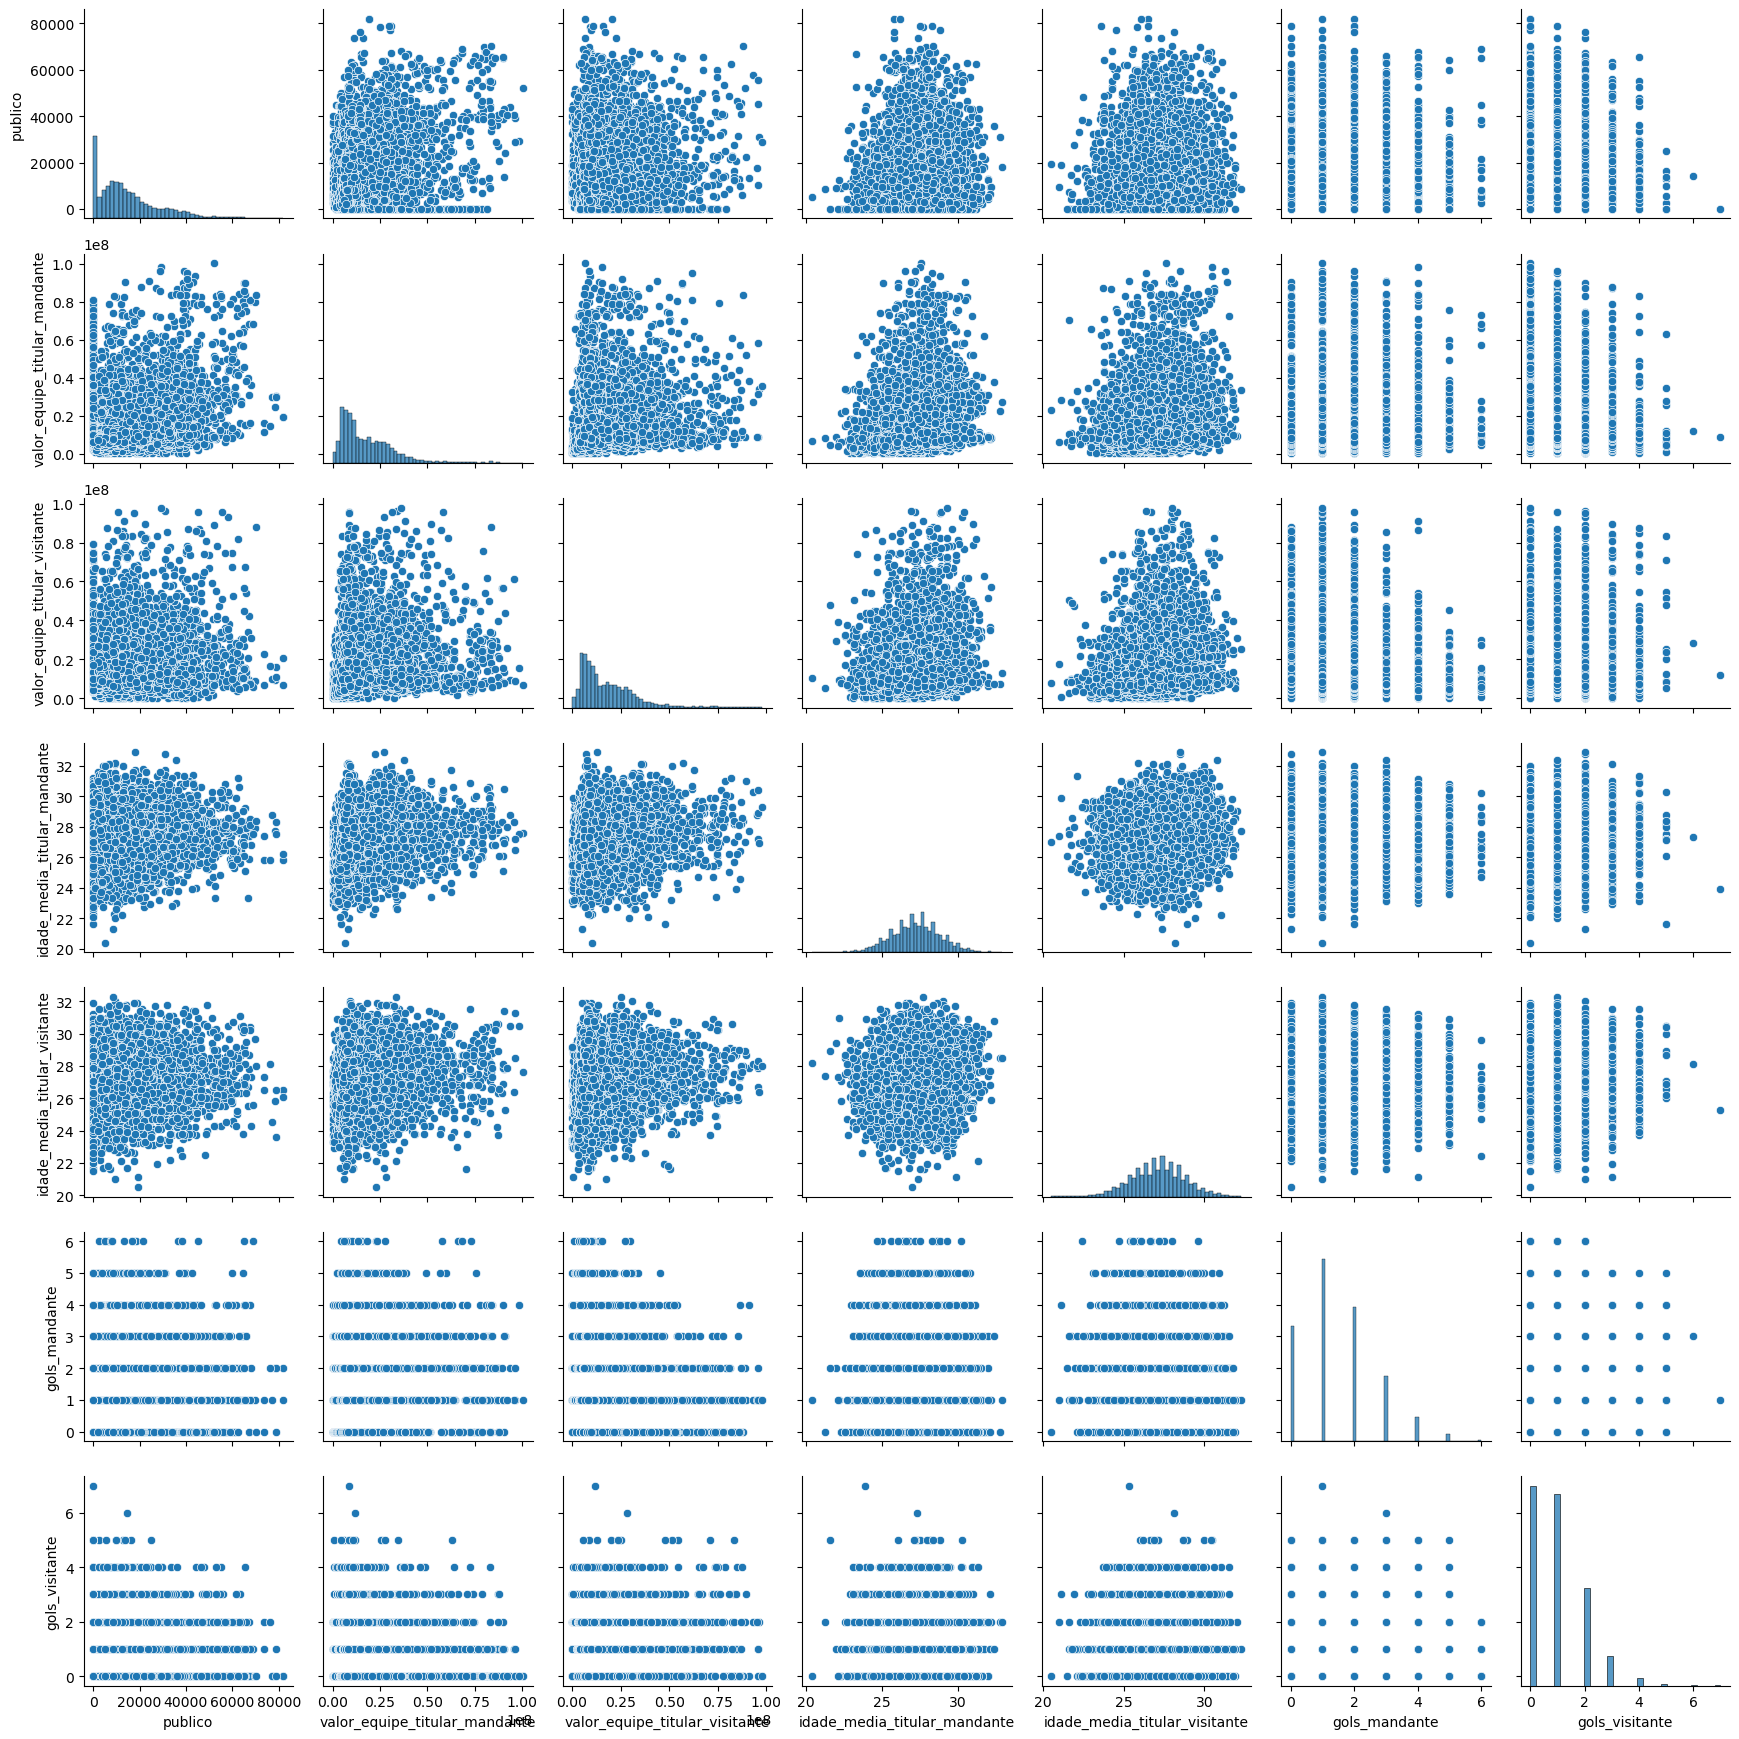

In [127]:
sns.pairplot(df_nan)
plt.tight_layout()
plt.show()